In [5]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/Titanic-Dataset.csv', index_col="PassengerId")
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


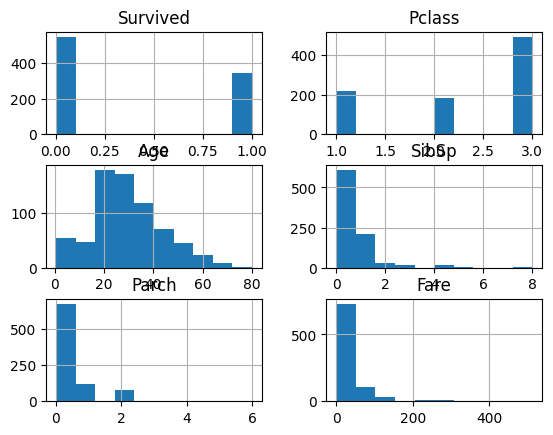

In [6]:
#plot histogram of each column
df.hist()
plt.show()

In [7]:
#describe the data
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#check number of missing values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
#filter passeg¡ngers whose surname starts with 'Andersson', survived and are younger than 40 years old
df[(df['Name'].str.contains('Andersson')) & (df['Survived'] == 1) & (df['Age'] < 40)]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S


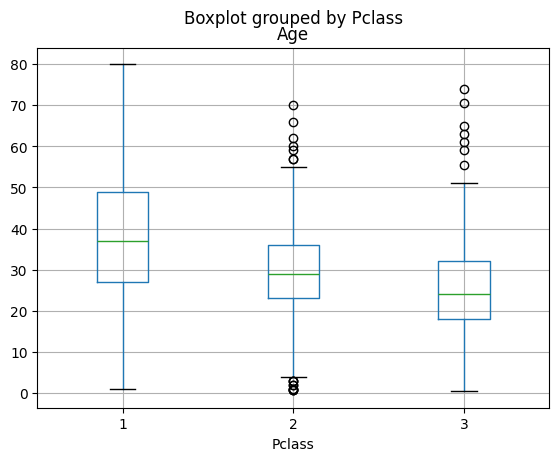

In [11]:
#plot age distribution by class
df.boxplot(column='Age', by='Pclass')
plt.show()

In [12]:
#fill empty values in 'Age' column with the mean of the class they belong to
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

#check number of missing values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: >]], dtype=object)

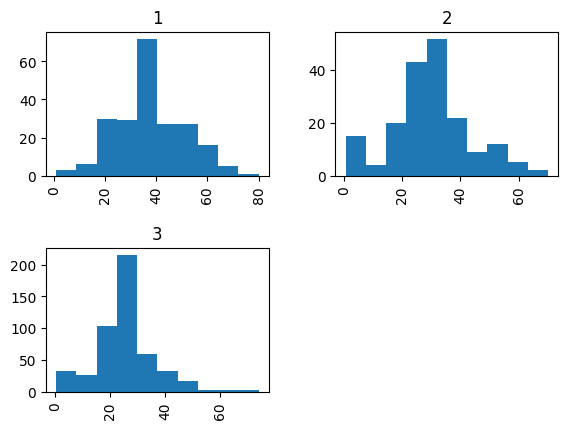

In [13]:
#plot age histogram by class
df.hist(column='Age', by='Pclass')

In [30]:
provincias = ['Granada', 'Sevilla', 'Cádiz', 'Huelva', 'Málaga', 'Córdoba', 'Jaén', 'Almería']
sort = provincias.pop()
sort

'Almería'

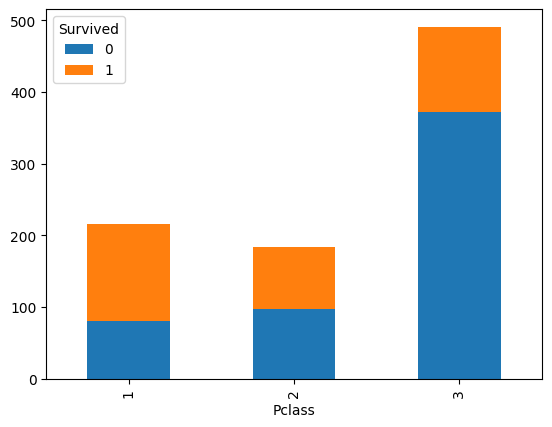

In [14]:
#plot dead and survived passengers by class
df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.show()



array([[<Axes: title={'center': 'C'}>, <Axes: title={'center': 'Q'}>],
       [<Axes: title={'center': 'S'}>, <Axes: >]], dtype=object)

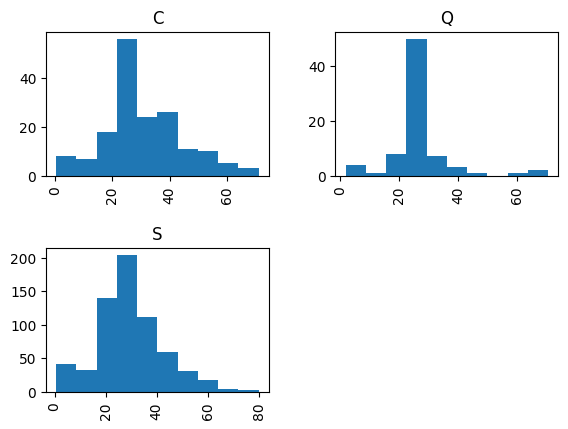

In [16]:
#check age distribution by embarked port
df.hist(column='Age', by='Embarked')

/var/folders/lp/4ygb41997bs8wflrf0qz0zf00000gn/T/ipykernel_51312/3906283672.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeGroup', 'Survived']).size().unstack().plot(kind='bar', stacked=True)


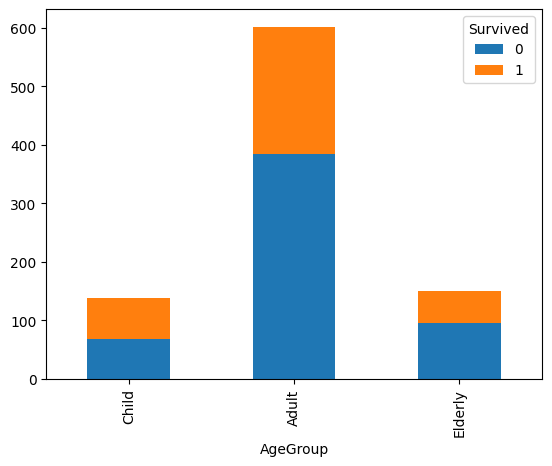

In [21]:
#check survival rate by age
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 40, 80], labels=['Child', 'Adult', 'Elderly'])
df.groupby(['AgeGroup', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

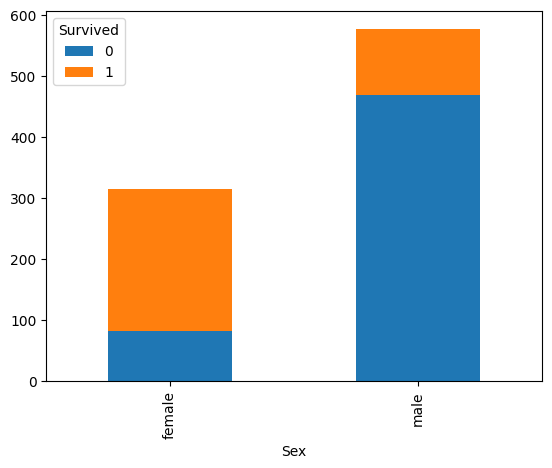

In [23]:
#check survival rate by genre

df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.show()


In [26]:
survival_rates = df.groupby('Sex')['Survived'].mean() * 100
print(survival_rates)
survival_rates = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_rates)


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64
